In [3]:
import skimage.io as io
from skimage.filters import threshold_otsu, threshold_local
from skimage.color import rgb2gray
import numpy as np
from skimage import data
from matplotlib import pyplot as plt
%matplotlib inline  
from skimage import img_as_ubyte

//anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [11]:
image = io.imread('dataset/36DC7480-F137-4D76-A1BA-3B3F9903C16A.jpg')
image = img_as_ubyte(rgb2gray(image))

//anaconda/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


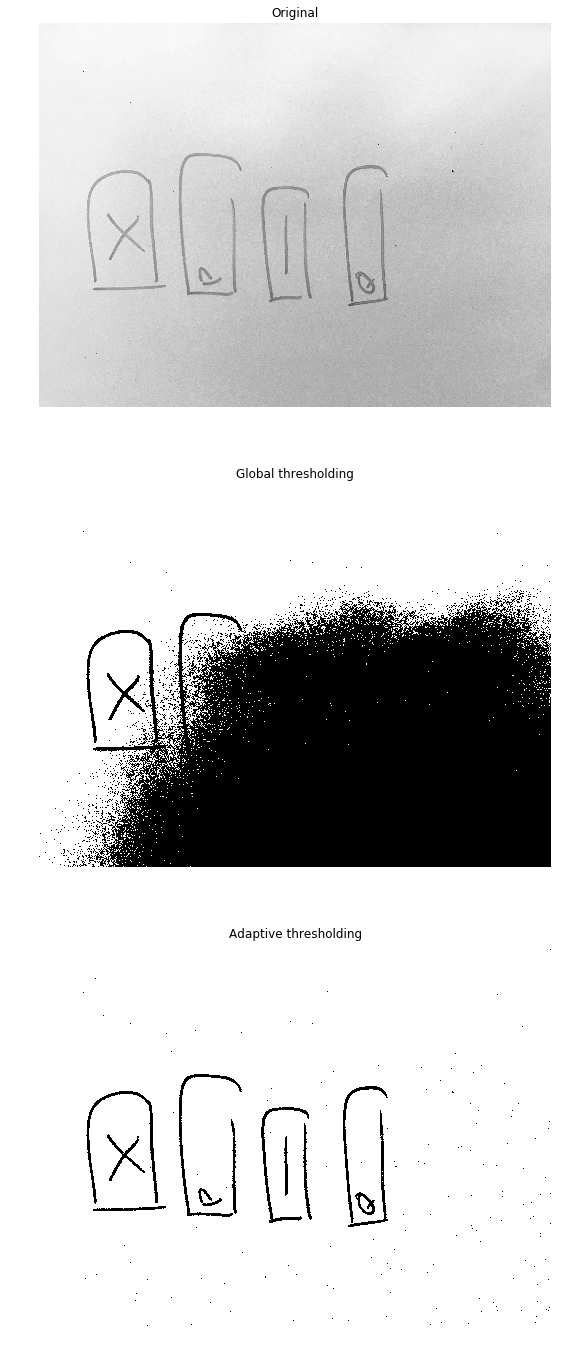

In [12]:
global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = (len(image) / 20) * 2 - 1
adaptive_thresh = threshold_local(image, block_size, offset=15)
binary_adaptive = image > adaptive_thresh

fig, axes = plt.subplots(nrows=3, figsize=(21, 24))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_adaptive)
ax[2].set_title('Adaptive thresholding')

for a in ax:
    a.axis('off')

plt.show()

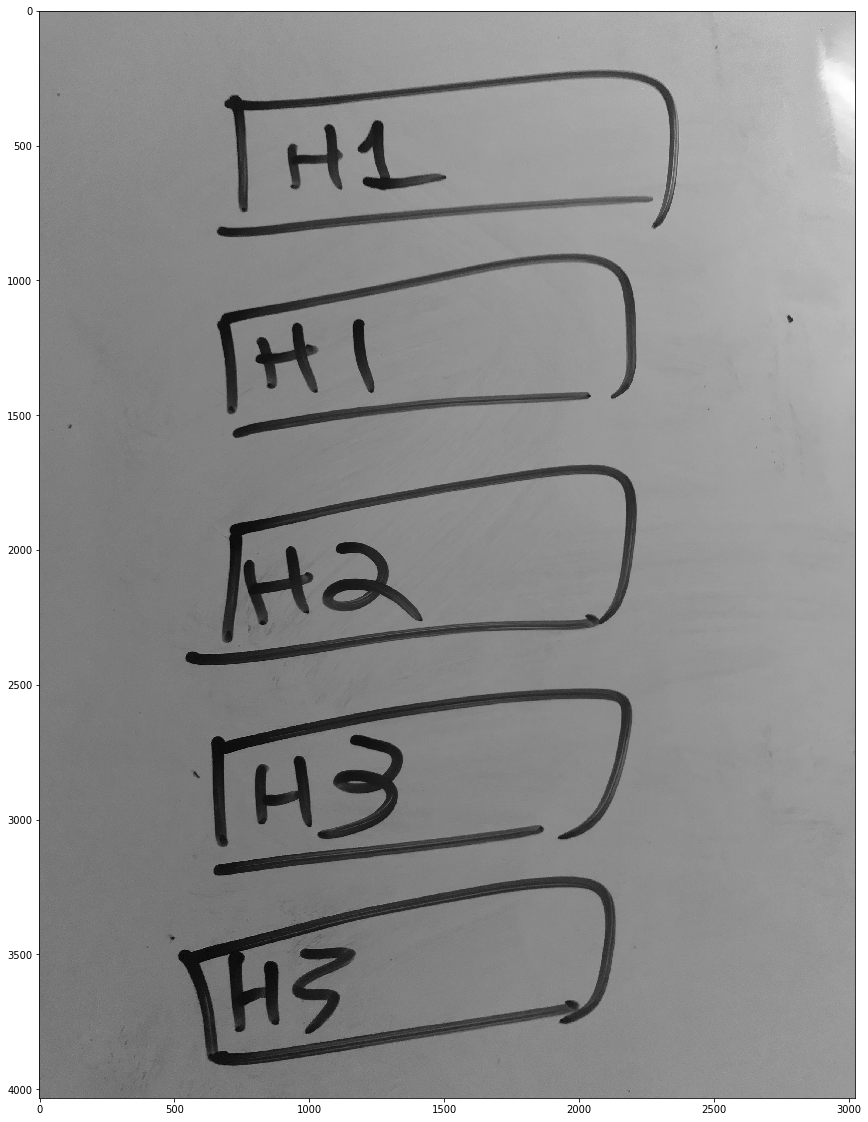

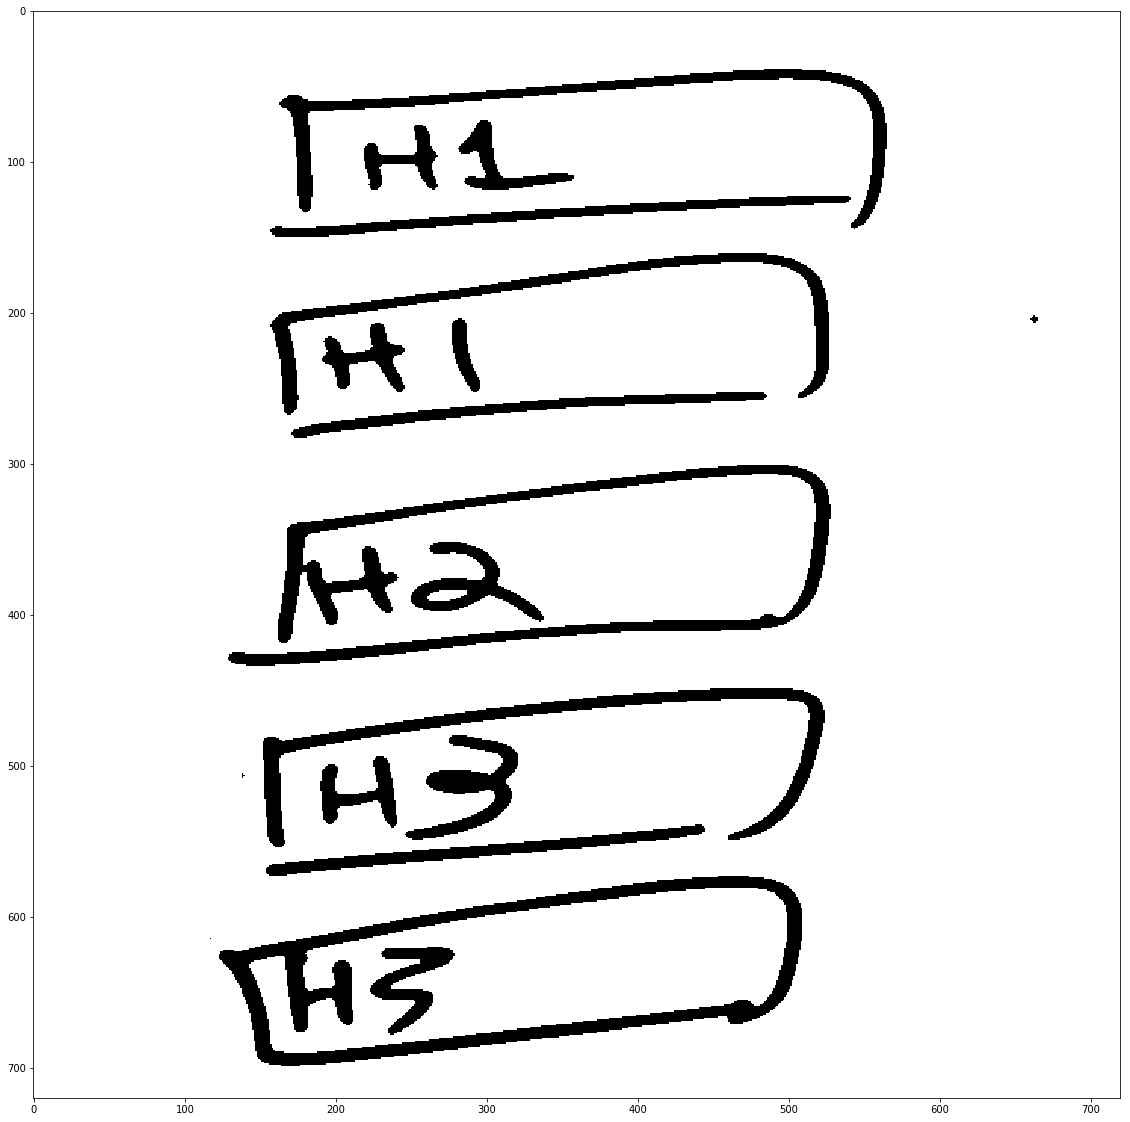

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('dataset/560333B3-86DC-488C-BC17-E72E0B5DD98A.jpg',0)
resized = cv2.resize(img, (720,720))
blurred = cv.medianBlur(resized, 5)
th3 = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,int(len(img)/20)*2-1,11)
        
images = [img, th3]
for i in range(2):
    plt.figure(figsize = (20,20))
    plt.imshow(images[i], cmap='gray')